In [78]:
# Import Julia packages
using DrWatson
@quickactivate
using Revise
using LinearAlgebra
using DelimitedFiles
using SparseArrays
using StaticArrays
using BlockArrays
using CairoMakie
using UnPack
using FromFile
using GeometryBasics
using Random
using Colors
using JLD2
using LaTeXStrings
using Glob
using Printf


@from "$(projectdir())/src/VertexModelContainers.jl" using VertexModelContainers
@from "$(projectdir())/src/Laplacians.jl" using Laplacians
@from "$(projectdir())/src/AnalysisFunctions.jl" using AnalysisFunctions
@from "$(projectdir())/src/CellProperties.jl" using CellProperties

In [158]:
f=Glob.glob("relax_disordered_T1/*3.99*γ=0.0289_*","C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims" )[1]

"C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\relax_disordered_T1\\L₀=3.99_realTimetMax=864000.0_t1Threshold=0.05_γ=0.0289_23-11-15-18-18-55"

In [159]:
@unpack R, matrices, params = load(datadir(f,"frameData/systemData100.jld2"))
@unpack B, Bᵀ, C, cellPositions, cellAreas, cellPerimeters = matrices
@unpack nCells,nVerts = params
mkpath(datadir(f,"eigenmodes"))

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


"C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\relax_disordered_T1\\L₀=3.99_realTimetMax=864000.0_t1Threshold=0.05_γ=0.0289_23-11-15-18-18-55\\eigenmodes"

In [160]:
G=makeG(params)#
M=makeM(matrices)
Lc=makeEvLc(M)
Lv=makeEvLv(M, G)


126×126 SparseMatrixCSC{SMatrix{2, 2, Float64, 4}, Int64} with 1464 stored entries:
⎡⠕⢅⠐⠀⠁⠔⠀⠒⡀⠨⣃⠔⠐⠅⠀⠒⡔⠀⠠⢀⡐⠀⠭⢀⠌⠙⠀⠀⡀⠠⢄⢀⠒⠂⠒⠁⠒⠀⠀⠁⎤
⎢⠐⠀⠑⢄⠀⠀⠠⠀⠀⠀⢈⠀⠀⠀⡀⠁⠐⠄⠀⠀⠈⢀⡁⠁⠀⠀⠁⢀⢀⡤⠀⠤⠀⠁⠒⠀⠲⠄⠀⠀⎥
⎢⢁⠄⠀⠀⠱⢆⠒⡀⠁⠉⡒⢆⢖⡄⠂⢀⢄⢀⡀⠙⡂⠒⠢⠲⣌⣁⢀⡀⠐⠂⠴⠀⢀⠀⡀⠉⣀⠈⠉⠁⎥
⎢⢠⠀⠀⠂⠘⠠⠑⣤⡀⠀⠑⠈⠀⠐⠒⡠⡠⢀⠀⠐⠂⠁⠀⠉⠀⠀⠡⠖⠒⢒⡀⢀⡤⣠⡄⢀⢀⡀⠀⠀⎥
⎢⡀⡈⠀⠀⡅⠀⠀⠈⢑⢔⠀⠀⠀⠀⠀⠀⠁⠉⢐⠰⠀⠀⣂⠀⢀⡀⠀⠀⠁⠈⠉⠈⠁⠀⠀⡎⠀⠙⠢⡴⎥
⎢⢉⠜⠂⠐⠸⢌⡑⠀⠀⠀⠛⢄⢬⠅⠂⢀⠌⠀⠀⠐⣇⡙⠫⡻⢤⠉⡊⠀⠀⠂⠠⠀⢀⡀⠁⠀⠁⠀⠀⠀⎥
⎢⠔⠄⠀⠀⠘⠵⢀⠀⠀⠀⠆⠗⠛⢄⣀⡀⠔⠀⠀⢀⠓⠃⠠⠈⠿⠴⠲⣂⣀⣀⠈⣀⡀⠀⠒⠀⢂⠀⠀⠀⎥
⎢⢠⠀⠄⠈⠈⢀⠘⡠⠀⠀⠈⢀⠀⠸⠱⢆⢀⠠⠀⠘⡁⠈⠀⠀⢀⠀⢀⡋⠎⠛⠀⠶⣄⠄⡀⠀⠰⠄⠀⠀⎥
⎢⠐⠉⠐⠄⠀⢑⠀⢊⡅⠀⠂⠁⠐⠁⠀⡐⡑⣬⡈⠀⠀⠀⠉⠀⢁⠐⠐⠂⠁⢈⡉⠌⡀⠐⠒⢨⣠⡄⢀⡀⎥
⎢⠀⢂⠀⠀⣄⠈⢀⠀⢐⡐⢀⠀⠀⢀⣀⠀⠂⠈⠑⢄⡀⠀⠂⠀⠈⠉⠀⠀⡀⠐⠂⠀⠀⠀⠀⡒⠉⠰⡎⣥⎥
⎢⠐⠈⠂⢀⢨⠈⠌⠀⠀⠀⣍⠹⠽⠀⡁⠈⠀⠀⠀⠈⠿⢇⡀⡬⠉⠀⠇⠀⢁⡀⠀⠀⠘⠂⠀⠀⠀⠀⠀⠀⎥
⎢⠃⢃⠅⠈⢨⡂⡄⠀⠈⠘⣯⡢⡀⠂⠀⠀⠃⠀⠈⠀⡀⡬⠟⣥⠂⠒⠅⠀⠀⠉⢁⠀⠀⠀⠀⠁⠀⠀⠀⠀⎥
⎢⣆⠁⠀⠀⠆⢹⠀⠀⠀⠰⡄⠓⢛⡇⠀⠐⢁⠐⡆⠀⠃⠀⢨⠀⣻⣾⢘⠀⠀⠀⠀⠀⠐⠀⡀⠆⡀⠀⠐⠆⎥
⎢⠀⠀⠁⢀⠀⠰⢡⠆⠀⠀⠊⠈⠸⢢⡤⠰⠰⠀⠀⠀⠉⠁⠁⠁⠒⠐⠱⣦⢠⣤⠀⠠⠀⠡⠦⠀⠀⠀⠀⠀⎥
⎢⠀⡈⠀⡴⠰⠀⢸⢀⡁⠀⠠⠀⠀⢸⣮⠁⡁⢀⢀⠈⠁⠰⡄⠀⠀⠀⠀⣶⠱⣦⡈⢬⠁⠀⠀⢀⠀⢀⠀⠀⎥
⎢⠀⢑⠀⡄⠐⠃⠀⢈⡃⠀⠀⠂⠂⢠⢠⡄⡃⠌⠈⠀⠀⠀⠁⠐⠀⠀⠀⡀⡂⣌⢛⣴⡀⠀⠀⠈⢠⠄⠀⠀⎥
⎢⠸⠀⠄⠀⠀⠐⠀⣫⠁⠀⠀⠰⠀⠈⠀⠝⢀⠈⠀⠀⠲⠀⠀⠀⠐⠀⠄⡀⠁⠀⠀⠈⡿⢏⣁⠀⠈⠁⠀⠀⎥
⎢⠜⠀⠘⠀⡄⠈⠀⢉⡠⠤⠁⠀⠘⠀⠀⠈⡘⣀⢠⠠⠀⠀⠄⠀⠠⠌⠈⠃⠀⢀⡀⠀⠁⠘⠛⢄⠁⣀⠄⠤⎥
⎢⠘⠀⠘⠆⡀⠘⠀⠰⣄⠀⠁⠀⠈⠐⠐⠆⠀⠾⢃⡀⠀⠀⠀⠀⠀⠈⠀⠀⠀⢀⠀⠖⠆⠀⠁⢠⠻⢆⡀⠀⎥
⎣⠄⠀⠀⠀⠇⠀⠀⠀⢈⡦⠀⠀⠀⠀⠀⠀⠀⠰⠎⣭⠀⠀⠀⠀⠰⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⡅⠀⠈⡵⣯⎦

In [161]:
evLc=eigen(Matrix(Lc*G))
evalLc=evLc.values
evecLc=Matrix(qr(evLc.vectors).Q)

evalLv,evecLv=LAPACK.syev!('V','U',deepcopy(Matrix(mortar(Lv))))


([-6.579405937552437e-15, -1.120184212887003e-15, -9.809314582852614e-16, -9.521321660759834e-16, -8.593473484581606e-16, -8.06749188449574e-16, -7.428211961193991e-16, -7.187290739636991e-16, -7.048266100042102e-16, -6.702693485017983e-16  …  3.391052834903028, 3.407187412495673, 3.4329840879695817, 3.470723774792383, 3.518845936356285, 3.638453928644062, 3.6955406360302385, 3.767148140618296, 3.795887833553469, 3.8971611111993036], [0.030772177001240315 0.007831500376925192 … -0.002450628619522582 0.08575130831431109; -0.001212435973961047 -0.05025503882204516 … -0.0007652958642629729 0.03153254356982875; … ; -0.10232440933557119 0.06167710413181406 … -0.006682038256335353 -0.03623665846277496; 0.7176078460803007 -0.0005445327346888414 … 0.006843298994547675 0.03370026345052394])

In [162]:
X=makeX(params, matrices)

128×126×126 Array{SMatrix{2, 2, Float64}, 3}:
[:, :, 1] =
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]  …  [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]  …  [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 ⋮                                       ⋱  ⋮
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]  …  [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0 0.0]  [0.0 0.0; 0.0 0.0]     [0.0 0.0; 0.0 0.0]
 [0.0 0.0; 0.0

In [163]:
@unpack cellPressures, cellTensions = matrices
g=vcat(cellPressures, -cellTensions)
gX=Matrix{SMatrix{2,2,Float64,4}}(undef,nVerts,nVerts)
fill!(gX,@SMatrix zeros(2,2))
for α=1:2*nCells
    gX+=g[α]X[α, :,:]
end

In [164]:
H=Matrix(mortar(Lv))+Matrix(mortar(gX))

#writedlm(datadir(f,"eigenmodes","H.csv"), H, ',') 

252×252 Matrix{Float64}:
  0.748481     0.232725    0.0        …   0.0         0.0         0.0
  0.232725     0.56257     0.0            0.0         0.0         0.0
  0.0          0.0         0.50228        0.0         0.0         0.0
  0.0          0.0         0.0298697      0.0         0.0         0.0
  0.0          0.0         0.0            0.0         0.0         0.0
  0.0          0.0         0.0        …   0.0         0.0         0.0
 -0.522799    -0.259713    0.0            0.0         0.0         0.0
 -0.0982034   -0.0486054   0.0            0.0         0.0         0.0
  0.0          0.0         0.0            0.0         0.0         0.0
  0.0          0.0         0.0            0.0         0.0         0.0
  ⋮                                   ⋱               ⋮          
  0.0          0.0         0.0           -0.031962   -0.261512    0.354054
  0.0          0.0         0.0            0.0         0.0         0.0
  0.0          0.0         0.0        …   0.0         0.0       

In [165]:
evalH,evecH=LAPACK.syev!('V','U',deepcopy(H))

([-5.758669780900998e-8, 4.6368362902077795e-17, 5.852434413938874e-17, 8.477215520279919e-7, 1.0532534705530509e-5, 1.3683855804525114e-5, 2.440626820786849e-5, 2.9461451242891084e-5, 4.460428532764179e-5, 4.7151351260221555e-5  …  3.391136062299651, 3.4076485740899343, 3.433016401867239, 3.470866443315668, 3.5191860725891537, 3.638568536075245, 3.695832537622697, 3.767396709647289, 3.796294883894361, 3.8972931525397194], [-0.002101593857446012 -0.08890198813212208 … -0.0023469560770617466 0.08573077942798174; -0.059950375927003634 0.005739724927442563 … -0.0007081577027758716 0.03152034364015094; … ; -0.07430409160767039 -0.08890198822132424 … -0.0068461558869804245 -0.036272212501608087; -0.07611675890057083 0.00573972490704502 … 0.007003774104317402 0.03369377729789644])

In [166]:
eigen(H).values

252-element Vector{Float64}:
 -5.758669780064745e-8
 -1.2896898203019553e-16
  3.906696648435265e-17
  8.477215520505422e-7
  1.053253470548049e-5
  1.3683855804486133e-5
  2.4406268207889264e-5
  2.9461451242897663e-5
  4.4604285327605633e-5
  4.715135126029579e-5
  ⋮
  3.407648574089937
  3.4330164018672447
  3.4708664433156544
  3.519186072589142
  3.6385685360752444
  3.6958325376226937
  3.76739670964728
  3.7962948838943604
  3.8972931525397274

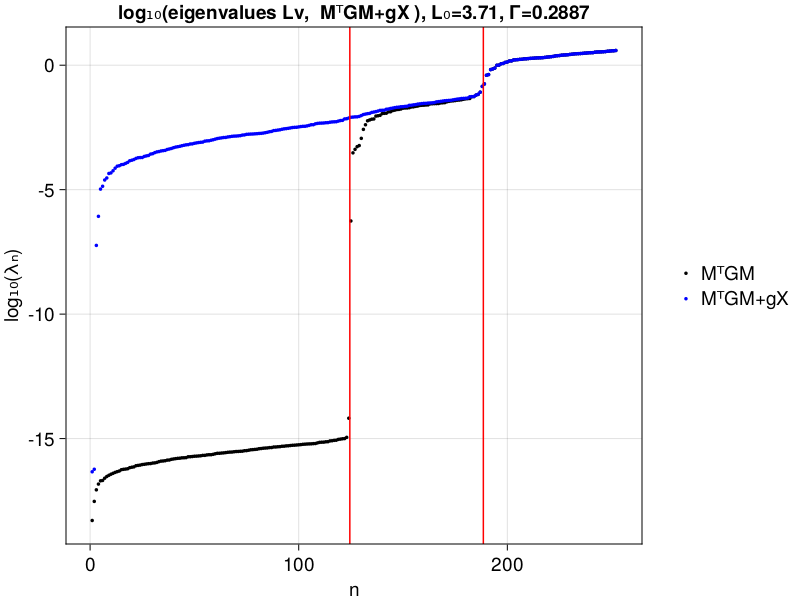

In [167]:
n=LinRange(1, 2*nVerts, 2*nVerts)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="log₁₀(eigenvalues Lv,  MᵀGM+gX ), L₀=3.71, Γ=0.2887")

scatter!(ax,n, log10.(sort(abs.(evalLv))), color=:black, label="MᵀGM", markersize=5)
scatter!(ax,n, log10.(sort(abs.(evalH))), color=:blue, label="MᵀGM+gX", markersize=5)
vlines!(ax,(2*nVerts-2*nCells)+0.5, color=:red)
vlines!(ax,(2*nVerts-nCells)+0.5, color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","Lv_MTGMgX_eigenvalues_L0_3.71_Gamma_0.2887_lines.png"),fig)
fig

In [168]:
DDpp=makeD(params,matrices, X, evalLv, evecLv, 2*nCells)
DDppevals,DDppevecs=LAPACK.syev!('V','U',deepcopy(DDpp))

([4.950098914469048e-5, 0.0017355269807688338, 0.0023221434186929198, 0.0025853928237490604, 0.003826898996885417, 0.004810552840833816, 0.007311110343977817, 0.007916501145052369, 0.0083052069484072, 0.008946951007993816  …  3.3911357694685322, 3.4076465607721955, 3.4330161935811176, 3.4708663088350966, 3.519185431941722, 3.638568040132249, 3.6958320172926062, 3.767396359670695, 3.796294193091423, 3.8972929645932703], [0.997191034106066 -0.010154788858801745 … 1.9619688176686557e-6 1.6026659860906306e-6; 0.005574053062831265 -0.0674944404440762 … 8.437489159031574e-5 -3.29523987352204e-5; … ; -2.3009791467222126e-7 1.3688123510234136e-6 … 0.9999908552088738 -0.000660615732620419; -2.223974276609422e-6 2.4977707737007683e-5 … 0.0006600751675244188 0.9999994604661249])

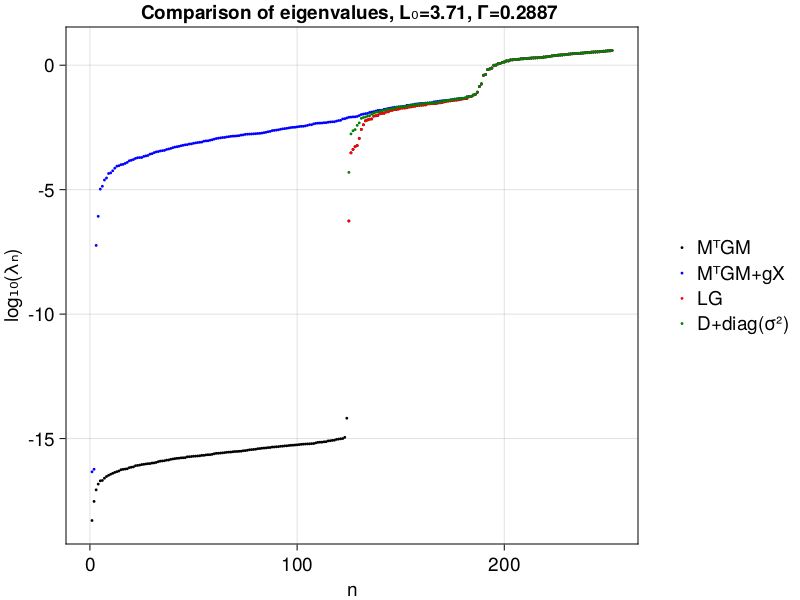

In [169]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="Comparison of eigenvalues, L₀=3.71, Γ=0.2887 ")

scatter!(ax,nv, log10.(sort(abs.(evalLv))), color=:black,markersize=4, label="MᵀGM")
scatter!(ax,nv, log10.(sort(abs.(evalH))), color=:blue,markersize=4, label="MᵀGM+gX")
scatter!(ax,nc, log10.(sort(abs.(evalLc))), color=:red,markersize=4, label="LG")
scatter!(ax,nD, log10.(sort(abs.(DDppevals))), color=:green,markersize=4, label="D+diag(σ²)")
#vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","compare_eigenvalues_L0_3.71_Γ_0.2887_log.png"),fig)
fig

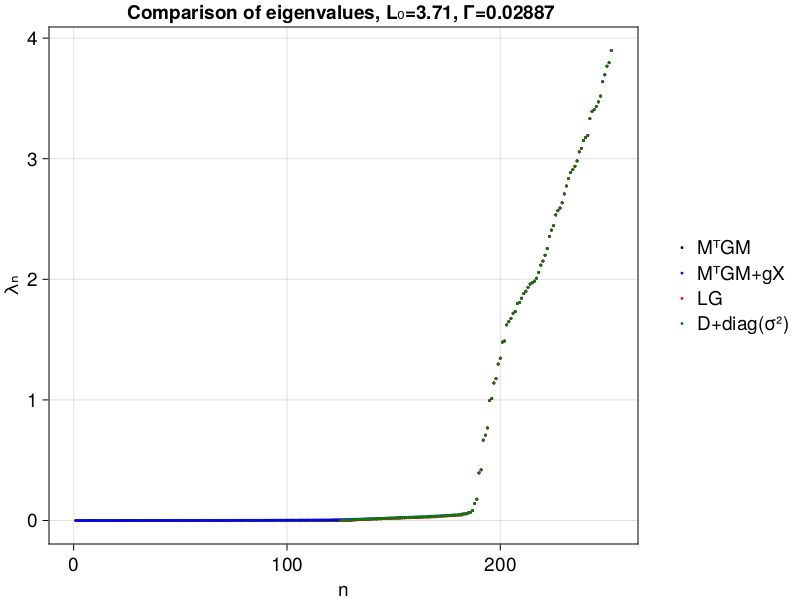

In [170]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="λₙ", title="Comparison of eigenvalues, L₀=3.71, Γ=0.02887 ")

scatter!(ax,nv, evalLv, color=:black,markersize=4, label="MᵀGM")
scatter!(ax,nv, evalH, color=:blue,markersize=4, label="MᵀGM+gX")
scatter!(ax,nc, evalLc, color=:red,markersize=4, label="LG")
scatter!(ax,nD, DDppevals, color=:green,markersize=4, label="D+diag(σ²)")
#vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","compare_eigenvalues_L0_3.71_Γ_0.02887.png"),fig)
fig

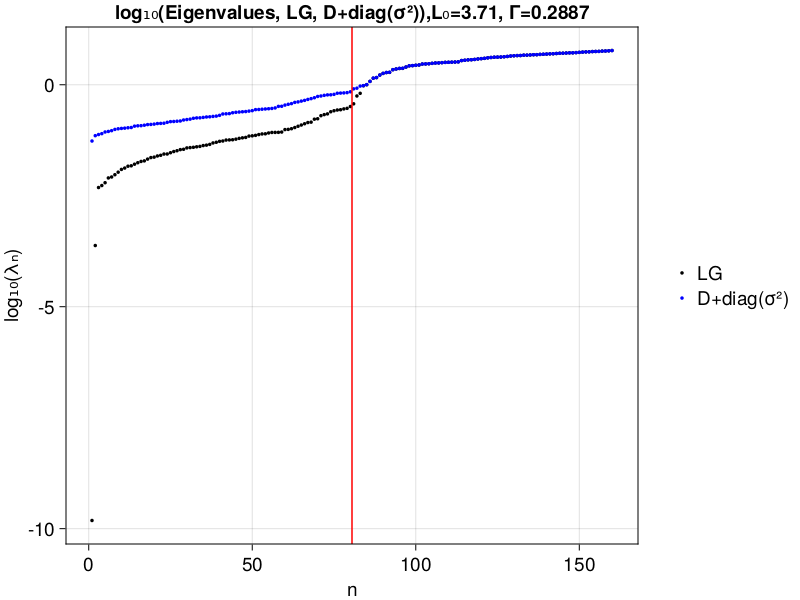

In [157]:

fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="log₁₀(Eigenvalues, LG, D+diag(σ²)),L₀=3.71, Γ=0.2887")

scatter!(ax,LinRange(1, 2*nCells, 2*nCells), log10.(evalLc), color=:black, label="LG", markersize=5)
scatter!(ax, LinRange(1, 2*nCells, 2*nCells), log10.(DDppevals), color=:blue, label="D+diag(σ²)", markersize=5)
fig[1, 2] = Legend(fig, ax, framevisible = false)
vlines!(ax,nCells+0.5, color=:red)
save(datadir(f,"eigenmodes","Lc_D_diag_sig_Evals_L0_3.71_Γ_0.2887_log.png"),fig)

fig

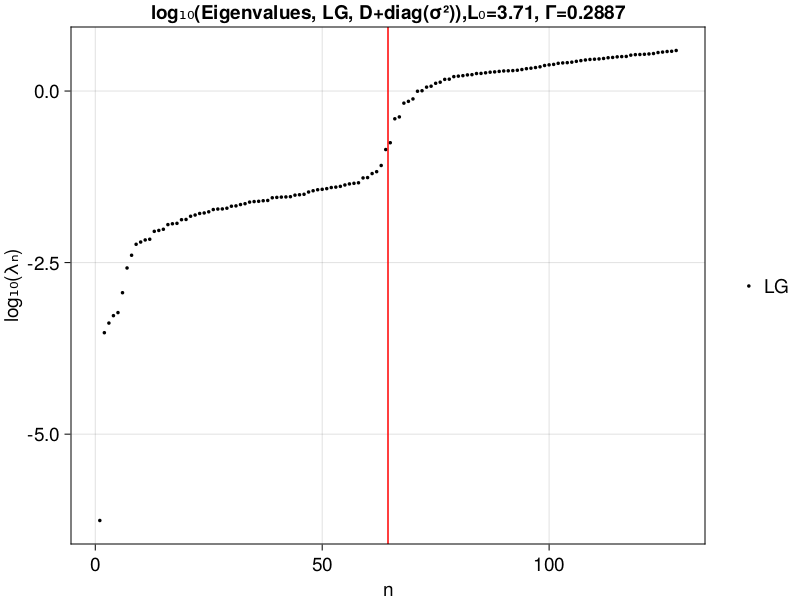

In [171]:

fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="log₁₀(Eigenvalues, LG, D+diag(σ²)),L₀=3.71, Γ=0.2887")

scatter!(ax,LinRange(1, 2*nCells, 2*nCells), log10.(evalLc), color=:black, label="LG", markersize=5)
#scatter!(ax, LinRange(1, 2*nCells, 2*nCells), log10.(DDppevals), color=:blue, label="D+diag(σ²)", markersize=5)
fig[1, 2] = Legend(fig, ax, framevisible = false)
vlines!(ax,nCells+0.5, color=:red)
#save(datadir(f,"eigenmodes","Lc_D_diag_sig_Evals_L0_3.71_Γ_0.2887_log.png"),fig)

fig

In [172]:

cellPolygons = makeCellPolygons(R,params,matrices)
for n=1:2*nCells
    Aevlims=(-maximum(abs.(evecLc[1:nCells,n])), maximum(abs.(evecLc[1:nCells, n])))
    Levlims=(-maximum(abs.(evecLc[ nCells+1:2*nCells,n])), maximum(abs.(evecLc[nCells+1:2*nCells, n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    a2=Axis(fig[2,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)
    hidedecorations!(a2)
    hidespines!(a2)
    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[evecLc[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a2,cellPolygons[i],color=[evecLc[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evalLc[n]),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes","orthogonal_eigenmodes$(@sprintf("%03d", n))_L0_3.71_Γ_0.02887.png"),fig)

    #display(fig)
end

In [ ]:
nCells

In [16]:

cellPolygons = makeCellPolygons(R,params,matrices)

80-element Vector{Vector{Point{2, Float32}}}:
 [[1.5368806, 0.36621958], [2.0040152, 0.23488106], [2.079286, -0.42186192], [1.5380735, -0.9716298], [1.2604495, -0.9587879], [0.97713745, -0.3989818]]
 [[-0.48042756, -2.6860125], [0.3987943, -2.5377703], [0.6439378, -2.9314635], [0.1135286, -3.6645746], [-0.6042237, -3.412342]]
 [[-3.7326171, -3.2236261], [-3.3602355, -2.998433], [-2.4562745, -3.4070919], [-2.3641558, -3.7563612], [-2.819609, -4.3178225]]
 [[-2.7228768, 2.6014993], [-2.4824915, 3.4251642], [-1.6659191, 3.3925338], [-1.5943495, 3.0073833], [-2.1442218, 2.245013], [-2.3792815, 2.2013378]]
 [[1.4419205, 4.864485], [1.353, 4.279858], [0.99009544, 4.083073], [0.10033296, 4.4895496], [0.010822232, 4.9985647]]
 [[2.5881007, 2.9716442], [3.3613014, 2.2925315], [3.1356604, 1.7421417], [2.3230298, 1.8728791], [2.2119963, 2.7768927]]
 [[1.3770528, 0.6654772], [1.5368806, 0.36621958], [0.97713745, -0.3989818], [0.46149394, -0.40393588], [0.31189314, -0.15854648], [0.46909022, 0.5132

In [ ]:
@unpack cellAreas, cellPerimeters = matrices
Aevlims=(minimum(abs.(cellAreas[1:nCells])), maximum(abs.(cellAreas[1:nCells])))
Levlims=(minimum(abs.(cellPerimeters[1:nCells])), maximum(abs.(cellPerimeters[1:nCells])))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,500))

a1=Axis(fig[1,1],aspect=DataAspect())
a2=Axis(fig[2,1],aspect=DataAspect())
hidedecorations!(a1)
hidespines!(a1)
hidedecorations!(a2)
hidespines!(a2)
for i=1:nCells
    poly!(a1,cellPolygons[i],color=cellAreas[i],colormap=:viridis,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a2,cellPolygons[i],color=cellPerimeters[i],colormap=:viridis,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))


Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:viridis,flipaxis=true)
Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:viridis,flipaxis=true)


Label(fig[1,1,Bottom()],string(L"Area"),fontsize = 32, rotation=0)
Label(fig[2,1,Bottom()],string(L"Perimeter"),fontsize = 32, rotation=0)
#Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
save(datadir(f,"eigenmodes","Area_Perimeter.png"),fig)

display(fig)

In [ ]:
@unpack cellAreas, cellPerimeters, cellPressures, cellTensions = matrices
Aevlims=(minimum(cellPressures[1:nCells]), maximum(cellPressures[1:nCells]))
Levlims=(minimum(-cellTensions[1:nCells]), maximum(-cellTensions[1:nCells]))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,500))

a1=Axis(fig[1,1],aspect=DataAspect())
a2=Axis(fig[2,1],aspect=DataAspect())
hidedecorations!(a1)
hidespines!(a1)
hidedecorations!(a2)
hidespines!(a2)
for i=1:nCells
    poly!(a1,cellPolygons[i],color=cellPressures[i],colormap=:plasma,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a2,cellPolygons[i],color=-cellTensions[i],colormap=:plasma,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))


Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:plasma,flipaxis=true)
Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:plasma,flipaxis=true)


Label(fig[1,1,Bottom()],string(L"Pressure"),fontsize = 32, rotation=0)
Label(fig[2,1,Bottom()],string(L"Tension"),fontsize = 32, rotation=0)
#Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
save(datadir(f,"eigenmodes","Pressures_Tensions.png"),fig)

display(fig)

In [24]:
cellShapeTensors=makeShapeTensors(R,params, matrices)

71-element Vector{SMatrix{2, 2, Float64}}:
 [0.3081255617914121 0.05838596915705019; 0.05838596915705019 0.14046351560838113]
 [0.22415551046051974 -0.01568201166471538; -0.01568201166471538 0.16988936629586734]
 [0.17462916450622223 0.0035229326987025605; 0.0035229326987025605 0.2402879831820586]
 [0.16204660115136965 0.08661330107630175; 0.08661330107630175 0.3398432837078324]
 [0.16769836372525307 -0.04801537568120029; -0.04801537568120029 0.2551634204181702]
 [0.1833772162835878 0.052311716749648685; 0.052311716749648685 0.24985818844708685]
 [0.28680700042041274 -0.02226565962445353; -0.02226565962445353 0.17833190260575774]
 [0.1770012116061696 0.010144110220332545; 0.010144110220332545 0.2670559622816489]
 [0.15444167688746496 0.03172715833937427; 0.03172715833937427 0.29172953531150814]
 [0.3670333916254539 0.027205750683764445; 0.027205750683764445 0.13259314431585262]
 ⋮
 [0.16915706196558827 0.04804764156798364; 0.04804764156798364 0.28064262603806706]
 [0.3316394597186794 0

In [95]:
Peff=getPeff(params, matrices)
cellQ, cellJ=makeCellQandJ(params, matrices)
cellShearStress=getShearStress(params, matrices, cellJ)

80-element Vector{Float64}:
 0.008895168880238932
 0.004122555273779565
 0.04514972631656904
 0.008053911923869889
 0.0509472443237219
 0.008277371516391387
 0.006190418438256089
 0.010946982549117154
 0.0050880089374862065
 0.021299170537988413
 ⋮
 0.005085205360024072
 0.04181431279961579
 0.020039832290709405
 0.0017536470007803978
 0.008970814873980482
 0.06609706489812857
 0.012584889104762648
 0.00552902871634717
 0.05217484264909776

(SMatrix{2, 2, Float64}[[0.6073884033572277 0.07934326503563843; 0.07934326503563843 0.3926115966427725], [0.5461625575282096 -0.02765061638969809; -0.027650616389698072 0.4538374424717903], [0.454845839965331 -0.027777144466155968; -0.027777144466155968 0.545154160034669], [0.39828764475103245 0.09487849260345214; 0.09487849260345213 0.6017123552489676], [0.4548242590130718 -0.06862560340740018; -0.06862560340740018 0.5451757409869283], [0.4416592470828797 0.06781068151560385; 0.06781068151560384 0.5583407529171203], [0.5563516323546638 -0.020698551456100528; -0.02069855145610052 0.4436483676453362], [0.45890016466227435 0.0005525680440889179; 0.0005525680440889752 0.5410998353377254], [0.418400055946662 0.043786015883013334; 0.043786015883013306 0.581599944053338], [0.6627605680605001 0.05336691642684967; 0.053366916426849646 0.33723943193949996]  …  [0.48582975314118343 -0.09360772733691573; -0.09360772733691573 0.5141702468588164], [0.42183988718375026 0.048702098893708634; 0.04870

71-element Vector{Float64}:
 0.0022547706825895557
 0.00031028954365596947
 0.0014446067844478328
 0.004964592591008226
 0.0010054538117084397
 0.0012670712226780351
 0.0016411716198734382
 0.0007578208934256363
 0.0015423936236661925
 0.008780207811739212
 ⋮
 0.0019996506033573475
 0.0033939020558344654
 0.012025929554454359
 0.005474339806965914
 0.0003481441808289883
 0.0005137145810539355
 0.00047509672543308225
 0.00036029668806052427
 0.0003708316696217676

In [8]:
circularity=getCircularity(params, cellShapeTensors)

80-element Vector{Float64}:
 0.38246288976702353
 0.570883301206009
 0.30449974732228635
 0.4335506870235461
 0.25852431299854156
 0.45837878941149723
 0.46413805573971045
 0.43200703055368705
 0.39514154714273997
 0.2579198776979389
 ⋮
 0.52760816153344
 0.2968384217541045
 0.255610032619395
 0.6230608550174214
 0.46998140793512105
 0.21326881057158473
 0.40724439720250233
 0.46656954715013
 0.25534744611085436

In [9]:
shapeAngle, stressAngle=getShapeStressAngle(params, cellShapeTensors, Peff)

([1.1342733308479624, 0.5465848912127893, 2.4807946966584016, 1.0233669276612636, 2.8904519786480427, 5.404586416672834, 0.8200913106573903, 5.040559591335286, 0.01307450168930845, 2.654163977497411  …  6.099404311157436, 6.057976815617709, 1.516120604025959, 4.879922919341899, 6.082776407298352, 4.886058670898646, 1.7922821239141649, 5.2088379183224, 6.203685118268691, 2.074701725407815], [2.705069657642859, 2.117381218007686, 2.4807946966584016, 2.59416325445616, 2.8904519786480427, -2.4493952173016487, 2.3908876374522867, -2.8134220426391976, 1.5838708284842051, 2.654163977497411  …  -1.754577322817047, -1.7960048183567738, 1.516120604025959, -2.9740587146325836, -1.7712052266761302, -2.967922963075837, 1.7922821239141649, -2.6451437156520825, -1.6502965157057914, 2.074701725407815])

In [ ]:
shearstress=cellShearStrain.*(-cellTensions)

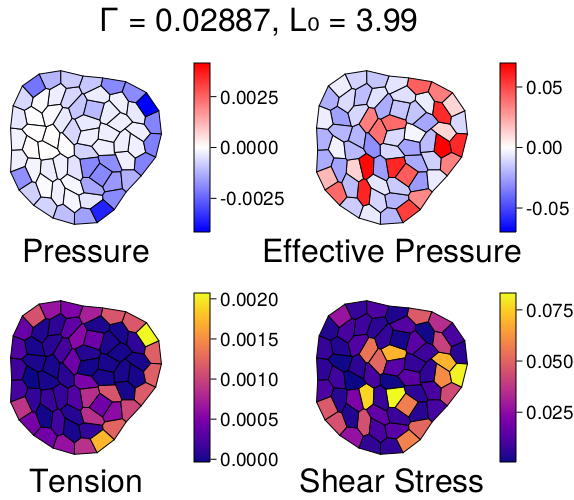

CairoMakie.Screen{IMAGE}


In [173]:

cellPolygons = makeCellPolygons(R,params,matrices)
@unpack cellAreas, cellPerimeters, cellPressures, cellTensions = matrices
Plims=(-maximum(abs.(cellPressures)), maximum(abs.(cellPressures)))
Tlims=(minimum(-cellTensions[1:nCells]), maximum(-cellTensions[1:nCells]))
Pefflims=(-maximum(abs.(Peff)), maximum(abs.(Peff)))
ShStlims=(minimum(cellShearStress[1:nCells]), maximum(cellShearStress[1:nCells]))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,500))

a11=Axis(fig[1,1],aspect=DataAspect())
a21=Axis(fig[2,1],aspect=DataAspect())
a13=Axis(fig[1,3],aspect=DataAspect())
a23=Axis(fig[2,3],aspect=DataAspect())
hidedecorations!(a11)
hidespines!(a11)
hidedecorations!(a21)
hidespines!(a21)
hidedecorations!(a13)
hidespines!(a13)
hidedecorations!(a23)
hidespines!(a23)
for i=1:nCells
    poly!(a11,cellPolygons[i],color=cellPressures[i],colormap=:bwr,colorrange=Plims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a21,cellPolygons[i],color=-cellTensions[i],colormap=:plasma,colorrange=Tlims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a13,cellPolygons[i],color=Peff[i],colormap=:bwr,colorrange=Pefflims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a23,cellPolygons[i],color=cellShearStress[i],colormap=:plasma,colorrange=ShStlims, strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))

colsize!(fig.layout,3,Aspect(1,1.0))


Colorbar(fig[1,2],limits=colorrange=Plims,colormap=:bwr,flipaxis=true)
Colorbar(fig[2,2],limits=colorrange=Tlims,colormap=:plasma,flipaxis=true)
Colorbar(fig[1,4],limits=colorrange=Pefflims,colormap=:bwr,flipaxis=true)
Colorbar(fig[2,4],limits=colorrange=ShStlims,colormap=:plasma,flipaxis=true)

Label(fig[1,1,Bottom()],"Pressure",fontsize = 32, rotation=0)
Label(fig[2,1,Bottom()],"Tension",fontsize = 32, rotation=0)

Label(fig[1,3,Bottom()],"Effective Pressure",fontsize = 32, rotation=0)
Label(fig[2,3,Bottom()],"Shear Stress",fontsize = 32, rotation=0)
Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
save(datadir(f,"eigenmodes","Stress.png"),fig)

display(fig)

In [ ]:
abs.(shearstress).-abs.(Peff)

In [89]:
evecLc

144×144 Matrix{Float64}:
 -0.000449301   0.00544879    0.000264749  …   0.0409288    -0.0303007
 -0.00052586   -4.9601e-5     0.000416144     -0.0207167     0.167649
 -0.000591145  -1.9104e-5    -0.000359585     -0.159083      0.00200003
 -0.000409721  -1.30659e-5   -0.000358077      0.00237618    0.000231331
  4.74138e-5    2.71264e-5    0.000104624      0.0128       -0.000544651
 -0.00047773   -1.75351e-5   -0.00036745   …   0.000703797   0.00357906
 -0.000240822  -7.89303e-6   -0.00011138       0.0219169     0.00103284
 -0.00119289   -7.7763e-5     0.000984362      0.0213141     0.0310397
 -0.000431092  -3.61513e-5    0.000377127      0.00943065    0.244798
 -0.000211484   5.89226e-7   -0.000222939      0.12003      -0.00105057
  ⋮                                        ⋱                
  0.0420664    -0.0231496     0.0124194    …   0.000353465  -4.30902e-5
  0.113395      0.00659738   -0.107661        -0.0001065     0.000352933
  0.0751218     0.0045796    -0.0809088       -0.0001

In [11]:
@unpack cellPressures,cellTensions =matrices

Reconstruct@MatricesContainer(Any[sparse([107, 147, 198, 132, 156, 165, 85, 143, 213, 13, 68, 189, 75, 99, 182, 46, 47, 204, 8, 18, 128, 8, 84, 129, 11, 30, 227, 12, 69, 138, 16, 38, 236, 78, 105, 215, 16, 20, 104, 53, 209, 221, 2, 48, 197, 94, 95, 98, 26, 145, 212, 10, 27, 174, 62, 119, 200, 28, 30, 60, 31, 77, 110, 7, 31, 130, 9, 152, 176, 64, 65, 164, 37, 38, 149, 37, 124, 125, 11, 40, 168, 50, 90, 185, 22, 43, 86, 5, 210, 219, 111, 155, 224, 26, 48, 85, 49, 50, 180, 35, 49, 153, 52, 93, 230, 32, 52, 54, 5, 56, 92, 73, 74, 218, 3, 59, 200, 12, 60, 137, 61, 62, 120, 61, 63, 123, 65, 81, 108, 33, 131, 161, 4, 39, 67, 14, 67, 134, 36, 70, 163, 9, 70, 72, 15, 55, 74, 4, 75, 135, 76, 77, 158, 18, 66, 76, 79, 145, 146, 79, 81, 194, 35, 83, 176, 27, 84, 173, 3, 44, 191, 63, 87, 144, 88, 89, 167, 40, 186, 228, 56, 91, 206, 91, 93, 171, 22, 95, 114, 6, 94, 96, 24, 97, 98, 57, 99, 139, 10, 100, 101, 90, 102, 179, 103, 104, 237, 54, 105, 216, 106, 107, 233, 51, 108, 195, 109, 110, 159, 21, 207

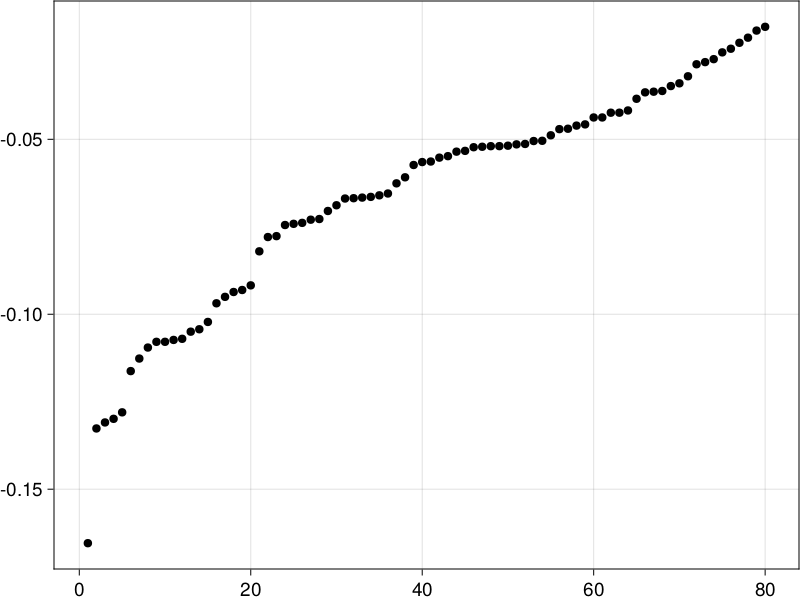

In [88]:
plot(sort(cellPressures))

In [98]:
evecLc[1:80,1]./cellPressures

80-element Vector{Float64}:
 0.7285111976952733
 0.7293054275236067
 0.7279828568817094
 0.7285152120436121
 0.7284449487609657
 0.7284607294082367
 0.7284533760885519
 0.7276741962598164
 0.7285805893519436
 0.7294405169359303
 ⋮
 0.7285381425967087
 0.728371607962373
 0.7284835903118998
 0.7286360396734624
 0.7286987905614685
 0.7283100066067684
 0.7291680625857595
 0.7294863576727866
 0.7284475433296668

In [99]:
evecLc[81:160,1]./(-cellTensions)

80-element Vector{Float64}:
 2.522903325478965
 2.5183661811679885
 2.524183512513519
 2.5229611135981664
 2.523269090732052
 2.5232108815845518
 2.523286276719448
 2.526209849834739
 2.522519503320847
 2.521013683072635
 ⋮
 2.5226757726120086
 2.523355798420065
 2.523146666586456
 2.5224059313473917
 2.5219330443548977
 2.523485749266561
 2.519245014449831
 2.517932421607499
 2.5232585469576785

In [101]:
cellPerimeters.*cellTensions./(2*cellAreas)

80-element Vector{Float64}:
 -0.034625134950498085
 -0.027481584346468763
 -0.14333926570441233
 -0.036591236455992084
 -0.1438538259944115
 -0.041705985504579136
 -0.025767746452307554
 -0.04979380844004587
 -0.020459451043757054
 -0.05963649086651645
  ⋮
 -0.03182887588177038
 -0.12776979838574817
 -0.06088934019656278
 -0.012637653749918033
 -0.046022621730446196
 -0.16720529358088587
 -0.051520411206369444
 -0.029106399086588026
 -0.14227148200128126

In [102]:
evecLc*evecLc'

160×160 Matrix{Float64}:
  1.0           9.99231e-17  -1.42784e-16  …   4.14167e-17   7.7616e-17
  9.99231e-17   1.0          -4.10752e-17      3.01976e-17  -2.02847e-17
 -1.42784e-16  -4.10752e-17   1.0              2.47804e-17   1.16187e-17
 -1.52798e-16   5.28369e-17  -7.38648e-17      5.86489e-17   7.19038e-17
 -1.05868e-17   7.89569e-17   5.14718e-18     -5.65808e-18  -5.95501e-17
  1.74891e-17   4.92975e-17   6.32473e-17  …   5.93895e-18   7.86276e-17
  3.16281e-16  -5.67995e-17   2.47429e-18      6.69453e-17   4.4987e-17
 -5.19663e-17   2.58716e-17   1.18009e-16     -1.81886e-17   1.64295e-17
 -2.38517e-17   1.27816e-16  -1.48834e-16      3.29414e-18  -8.52161e-17
  3.72102e-17  -2.21636e-16   5.99897e-17      3.24342e-17  -1.75668e-17
  ⋮                                        ⋱                
  1.16948e-16  -2.7048e-17    8.63026e-17     -2.75696e-17   9.25118e-18
  2.77312e-17  -3.17788e-17   1.24751e-16      2.31748e-17  -1.0569e-18
 -1.58649e-17  -3.10919e-17  -4.03465e-17

In [122]:
@unpack cellTensions, cellPressures = matrices
@unpack nCells, nVerts = params
q=2*nCells-1
g=vcat(cellPressures, -cellTensions)

gX=Matrix{SMatrix{2,2,Float64,4}}(undef,nVerts,nVerts)
fill!(gX,@SMatrix zeros(2,2))
for α=1:2*nCells
    gX+=g[α]X[α, :,:]
end

D=zeros(2*nVerts, 2*nVerts)
qeval=evalLv[2*nVerts+1-q: 2*nVerts]
qevec=evecLv[:, 2*nVerts+1-q:2*nVerts]

D=evecLv'*Matrix(mortar(gX))*evecLv
for i=1:q
    D[(2*nVerts-q)+i,(2*nVerts-q)+i]+=qeval[i]
end

In [124]:

DDpptotevals,DDpptotevecs=LAPACK.syev!('V','U',deepcopy(D))

([-9.956209563764215e-7, 2.383365084546199e-17, 1.7837688112477284e-16, 0.004180934180006661, 0.004258496616709869, 0.007270250964788734, 0.008103023728423881, 0.010171657305893292, 0.011139006367024811, 0.012125345210254686  …  5.431044719472347, 5.48643905971026, 5.513137412672599, 5.5848608850563, 5.61694435185512, 5.6342244895773534, 5.713799446125673, 5.751803116994268, 5.801107497178969, 5.885679860692112], [0.12389034308151593 0.10385992570361277 … 2.5622914125595352e-5 8.238673456789769e-7; 0.020045353346045736 -0.037174882308580376 … 0.0003571552157117188 2.113971313268905e-5; … ; 2.1827502508319827e-7 1.6490485773799113e-17 … 0.9993836125174262 0.017374477030292518; 1.6578284055386484e-8 -1.4282597701093596e-18 … -0.016476477061554137 0.9987240227661965])

In [125]:
D-D'

316×316 Matrix{Float64}:
  0.0           3.46945e-18  -5.20417e-18  …  -4.87891e-19  -5.42101e-19
 -3.46945e-18   0.0          -6.93889e-18     -1.6263e-17    2.45301e-18
  5.20417e-18   6.93889e-18   0.0              3.36103e-18   1.9685e-18
  1.73472e-18   2.77556e-17  -5.20417e-18      7.48099e-18   3.55076e-18
 -6.07153e-18  -9.54098e-18  -1.9082e-17       2.38524e-18   3.86247e-19
 -3.90313e-18   3.46945e-17   6.07153e-18  …  -3.03577e-18   3.21195e-18
  1.73472e-18  -6.93889e-18   1.38778e-17      8.45678e-18   4.17418e-18
 -3.46945e-18  -2.60209e-17   6.93889e-18     -4.11997e-18   3.25261e-19
  3.46945e-18   6.93889e-18   0.0             -3.46945e-18   5.14996e-18
  3.46945e-18  -2.68882e-17  -1.04083e-17     -5.20417e-18   1.42979e-18
  ⋮                                        ⋱                 ⋮
 -1.76183e-19   8.45678e-18  -2.38524e-18      2.1684e-19   -3.25261e-19
 -2.81893e-18  -3.03577e-18  -2.38524e-18     -1.73472e-18   4.33681e-19
 -2.27682e-18  -6.01732e-18  -1.96512

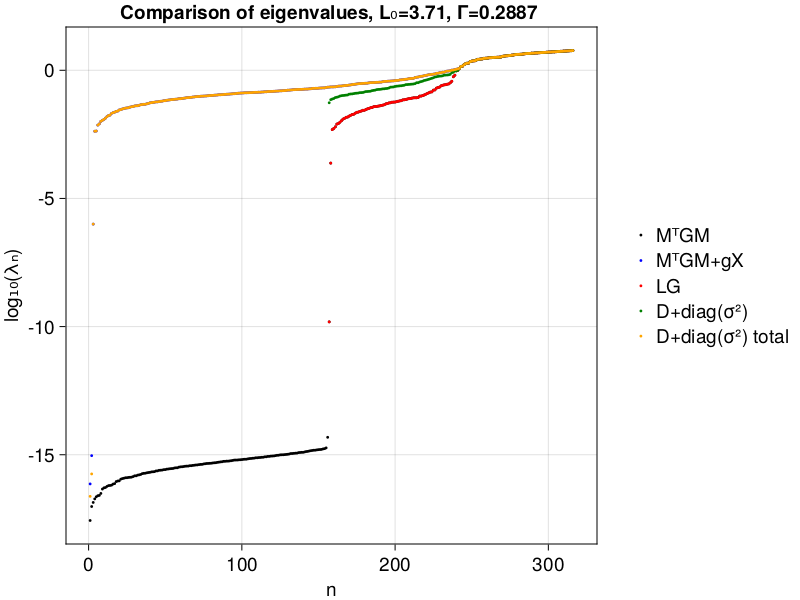

In [127]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="Comparison of eigenvalues, L₀=3.71, Γ=0.2887 ")

scatter!(ax,nv, log10.(sort(abs.(evalLv))), color=:black,markersize=4, label="MᵀGM")
scatter!(ax,nv, log10.(sort(abs.(evalH))), color=:blue,markersize=4, label="MᵀGM+gX")
scatter!(ax,nc, log10.(sort(abs.(evalLc))), color=:red,markersize=4, label="LG")
scatter!(ax,nD, log10.(sort(abs.(DDppevals))), color=:green,markersize=4, label="D+diag(σ²)")
scatter!(ax,nv, log10.(sort(abs.(DDpptotevals))), color=:orange,markersize=4, label="D+diag(σ²) total")
#vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","compare_eigenvalues_L0_3.71_Γ_0.2887_log.png"),fig)
fig

In [132]:
DDpptotevecs*DDpptotevecs'

316×316 Matrix{Float64}:
  1.0          -3.4311e-16   -2.77284e-16  …  -6.0152e-19   -1.61483e-18
 -3.4311e-16    1.0          -6.16949e-18      2.66982e-17  -5.82945e-19
 -2.77284e-16  -6.16949e-18   1.0              4.4863e-17   -2.81189e-18
  1.58695e-16  -1.89644e-16  -1.04148e-16      2.704e-17     2.02439e-18
  7.47608e-17  -4.24375e-16   1.41412e-16     -3.23468e-17  -1.81791e-18
 -1.33963e-16  -1.25325e-17   1.50474e-16  …  -3.2645e-17    1.5973e-18
  2.68152e-16  -2.13902e-16  -7.69837e-16      4.1023e-18   -3.02448e-18
 -6.47689e-16   4.44502e-16   1.71418e-16     -1.50387e-17  -8.2087e-19
 -7.78649e-17  -3.52028e-16   2.85986e-16     -4.77551e-17   1.4876e-19
 -1.75352e-16   9.52424e-16   1.11277e-16     -4.28715e-17   1.35198e-18
  ⋮                                        ⋱                 ⋮
  1.00648e-17   9.40831e-17  -7.26738e-18     -2.52176e-16   2.20135e-18
 -4.97263e-17   1.59863e-17   9.9127e-17      -4.27474e-17   1.1719e-17
  3.97084e-19  -1.65504e-17  -6.91524e-1

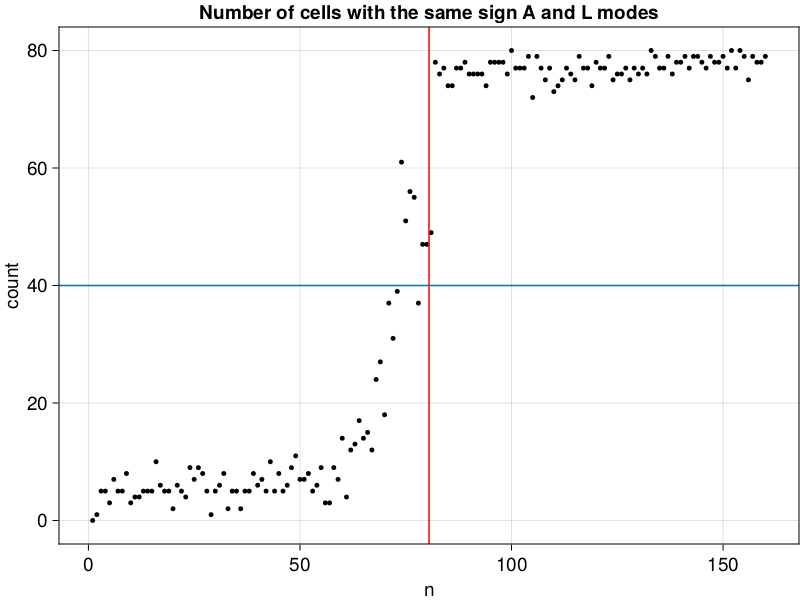

In [142]:
modeSign=zeros(2*nCells)
mode_mag_plus=zeros(2*nCells)
mode_mag_minus=zeros(2*nCells)
mode_magL_plus=zeros(2*nCells)
mode_magL_minus=zeros(2*nCells)
mode_magA_plus=zeros(2*nCells)
mode_magA_minus=zeros(2*nCells)
for n=1:2*nCells
    a=evecLc[1:nCells,n].*evecLc[nCells+1:end,n]
    bA=evecLc[1:nCells,n]
    bL=evecLc[nCells+1:end,n]
    modeSign[n]=length(a[a.>0])
    mode_mag_plus[n]=sum(a[a.>0])
    mode_mag_minus[n]=sum(a[a.<0])
    mode_magL_plus[n]=sum(bL[a.>0])
    mode_magL_minus[n]=sum(bL[a.<0])
    mode_magA_plus[n]=sum(bA[a.>0])
    mode_magA_minus[n]=sum(bA[a.<0])
end
n=LinRange(1, 2*nCells, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="count", title="Number of cells with the same sign A and L modes")

#scatter!(ax,n, mode_magL_plus, color=:red, label="Σ L modes, same sign", markersize=7)
#scatter!(ax,n, mode_magL_minus, color=:blue, label="Σ L modes, opposite", markersize=7)
#scatter!(ax,n, mode_magA_plus.+ mode_magL_plus, color=:red, label="Σ same sign", markersize=7)
#scatter!(ax,n, mode_magA_minus.+ mode_magL_minus, color=:blue, label="Σ opposite sign", markersize=7)
scatter!(ax,n, modeSign, color=:black, label="Σ L modes, same sign", markersize=7)


#vlines!(ax,2*nVerts-(2*nCells) +0.5, color=:red)
vlines!(ax,nCells+0.5, color=:red)
hlines!(ax, 40)
#fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","mode_sign.png"),fig)
fig

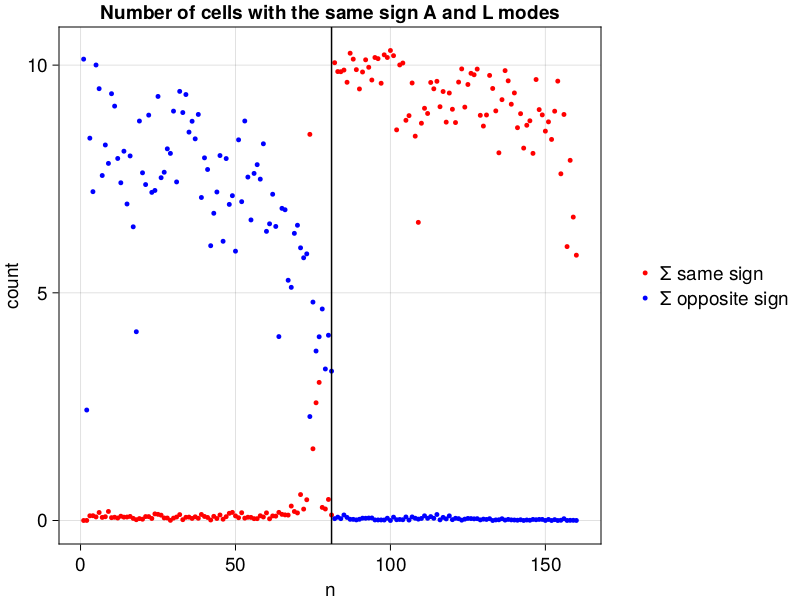

In [155]:
modeSign=zeros(2*nCells)
mode_mag_plus=zeros(2*nCells)
mode_mag_minus=zeros(2*nCells)
mode_magL_plus=zeros(2*nCells)
mode_magL_minus=zeros(2*nCells)
mode_magA_plus=zeros(2*nCells)
mode_magA_minus=zeros(2*nCells)
for n=1:2*nCells
    a=evecLc[1:nCells,n].*evecLc[nCells+1:end,n]
    bA=evecLc[1:nCells,n]
    bL=evecLc[nCells+1:end,n]
    modeSign[n]=length(a[a.>0])
    mode_mag_plus[n]=sum(a[a.>0])
    mode_mag_minus[n]=sum(a[a.<0])
    mode_magL_plus[n]=sum(abs.(bL[a.>0]))
    mode_magL_minus[n]=sum(abs.(bL[a.<0]))
    mode_magA_plus[n]=sum(abs.(bA[a.>0]))
    mode_magA_minus[n]=sum(abs.(bA[a.<0]))
end
n=LinRange(1, 2*nCells, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="count", title="Number of cells with the same sign A and L modes")

#scatter!(ax,n, mode_magL_plus, color=:red, label="Σ L modes, same sign", markersize=7)
#scatter!(ax,n, mode_magL_minus, color=:blue, label="Σ L modes, opposite", markersize=7)
scatter!(ax,n, mode_magA_plus.+ mode_magL_plus, color=:red, label="Σ same sign", markersize=7)
scatter!(ax,n, mode_magA_minus.+ mode_magL_minus, color=:blue, label="Σ opposite sign", markersize=7)
#scatter!(ax,n, modeSign, color=:black, label="Σ L modes, same sign", markersize=7)


#vlines!(ax,2*nVerts-(2*nCells) +0.5, color=:black)
vlines!(ax,81, color=:black)
#hlines!(ax, 40)
fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","mode_sign.png"),fig)
fig

In [146]:
@unpack boundaryEdges, B̄= matrices

cells=[x for x in 1:nCells]
boundaryEdgeIndex=findall(x->x!=0,boundaryEdges)

boundaryCells=getindex.(findall(x->x!=0,Matrix(B̄)[:,boundaryEdgeIndex]), 1)
interiorCells=setdiff(cells, boundaryCells)

59-element Vector{Int64}:
  1
  2
  4
  6
  7
  8
  9
 10
 13
 14
  ⋮
 69
 70
 71
 72
 74
 75
 76
 78
 79

In [148]:
for n=1:2*nCells
    Aintlims=(-maximum(abs.(evecLc[interiorCells,n])), maximum(abs.(evecLc[interiorCells,n])))
    Lintlims=(-maximum(abs.(evecLc[interiorCells.+length(nCells),n])), maximum(abs.(evecLc[interiorCells.+length(nCells),n])))
    Aboundlims=(-maximum(abs.(evecLc[boundaryCells,n])), maximum(abs.(evecLc[boundaryCells,n])))
    Lboundlims=(-maximum(abs.(evecLc[boundaryCells.+length(nCells),n])), maximum(abs.(evecLc[boundaryCells.+length(nCells),n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a11=Axis(fig[1,1],aspect=DataAspect())
    a21=Axis(fig[2,1],aspect=DataAspect()) 
    a12=Axis(fig[1,3],aspect=DataAspect())
    a22=Axis(fig[2,3],aspect=DataAspect())
    hidedecorations!(a11)
    hidespines!(a11)
    hidedecorations!(a21)
    hidespines!(a21)
    hidedecorations!(a12)
    hidespines!(a12)
    hidedecorations!(a22)
    hidespines!(a22)
    for i in interiorCells
        poly!(a11,cellPolygons[i],color=[evecLc[1:nCells,n][i]],colormap=:bwr,colorrange=Aintlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a21,cellPolygons[i],color=[evecLc[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Lintlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    for i in boundaryCells
        poly!(a12,cellPolygons[i],color=[evecLc[1:nCells,n][i]],colormap=:bwr,colorrange=Aboundlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a22,cellPolygons[i],color=[evecLc[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Lboundlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evalLc[n]),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))
    colsize!(fig.layout,3,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aintlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Lintlims,colormap=:bwr,flipaxis=true)
    
    Colorbar(fig[1,4],limits=colorrange=Aboundlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,4],limits=colorrange=Lboundlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes","eigenmodes_split_edge$(@sprintf("%03d", n)).png"),fig)

    #display(fig)
end